## 机器学习P4 探索数据集项目——《泰坦尼克号生还探测》

### 数据集选择
    泰坦尼克号数据：包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。数据集来自Kaggle。

### 探索问题

    1.探索不同性别的存活率
    2.探索不同年龄段的存活率
    3.探索不同仓位的存活率
    4.探索不同票价的存活率
    5.探索不同登船港口的存活率

### 数据导入+清洗

In [143]:
# 引入所需要的类库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [144]:
# 导入数据
titanic_df = pd.read_csv('./titanic-data.csv')
# 了解数据情况
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


分析数据：从以上数据可以看出字段Age、Cabin都有NaN的情况，下一步删除NaN的记录

In [145]:
# 为了提升效率，删除不相关字段
non_titanic_df = titanic_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis = 1)

In [146]:
# 通用函数,删除data中指定字段的NaN的记录
def clean_data_nan(data, subset):
    return data.dropna(subset = subset)

In [147]:
# 清除对应字段的NaN记录
titanic_age_survived = clean_data_nan(non_titanic_df, ['Survived','Age'])
titanic_embarked_survived = clean_data_nan(non_titanic_df, ['Survived','Embarked'])

print len(titanic_age_survived)
print len(titanic_embarked_survived)

714
889


In [148]:
non_titanic_df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


从以上信息可以看出,平均生还率约38%

### 数据分析, 函数实现

In [149]:
# 通用函数，判断指定因素对存活率的影响
def influence(data,element):
    # 判断**对存活率的影响
    groupby_element = data.groupby(element)
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # **的生还人数
    print("生还人数")
    print(survived_groupby_element)
    # **的总人数
    print("总人数")
    print(total_groupby_element)
    # **的生还率
    print("生还率")
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图**的生还率
    survived_rate_element.plot(kind='bar')
    plt.title(element + 'Survival rate')
    plt.xlabel(element)
    plt.ylabel('survived')
    plt.show()

In [150]:
# 通用分组
def cla(n, lim):
    if n == 0:
        return 'unknown'
    return '[%d, %d)' % (lim * (n // lim), lim * (n // lim) + lim)

# 通用函数, 判断指定因素, 指定区间对存活率的影响
def section_influence(data, element, lim):

    section_group = pd.DataFrame({
        'element_group': [cla(section, lim) for section in data[element]]
    })

    groupby_section = pd.concat([data['Survived'], section_group], axis=1)

    groupby_element = groupby_section.groupby('element_group')
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # 分组的生还人数
    print(survived_groupby_element)
    # 分组的总人数
    print(total_groupby_element)
    # 分组的生还率
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图分组的生还率
    survived_rate_element.plot(kind='bar')
    plt.title(element + 'Survival rate')
    plt.xlabel(element)
    plt.ylabel('survived')
    survived_rate_element.plot(kind='pie',subplots=True)
    plt.show()

生还人数
        Survived  Pclass       Age        Fare
Sex                                           
female       233     678   7286.00  13966.6628
male         109    1379  13919.17  14727.2865
总人数
        Survived  Pclass  Age  Fare  Embarked
Sex                                          
female       314     314  261   314       312
male         577     577  453   577       577
生还率
              Age  Embarked       Fare    Pclass  Survived
Sex                                                       
female  27.915709       NaN  44.479818  2.159236  0.742038
male    30.726645       NaN  25.523893  2.389948  0.188908


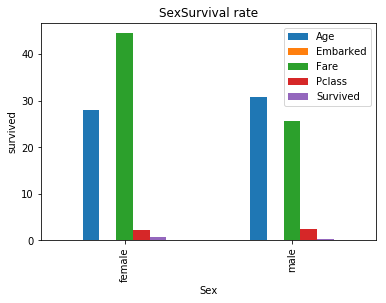

In [151]:
# 性别对存活率的影响
influence(non_titanic_df, 'Sex')

分析结果：女性的存活率较高约为74%

               Survived
element_group          
[0, 20)            49.0
[20, 40)          137.0
[40, 60)           39.0
[60, 80)            7.0
[80, 100)           0.0
               Survived
element_group          
[0, 20)             135
[20, 40)            305
[40, 60)            104
[60, 80)             22
[80, 100)             1
               Survived
element_group          
[0, 20)        0.362963
[20, 40)       0.449180
[40, 60)       0.375000
[60, 80)       0.318182
[80, 100)      0.000000


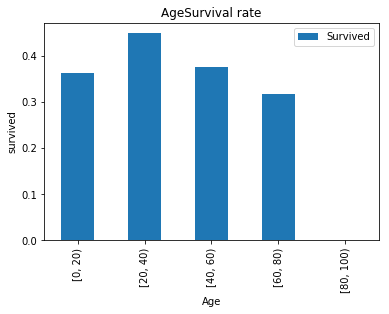

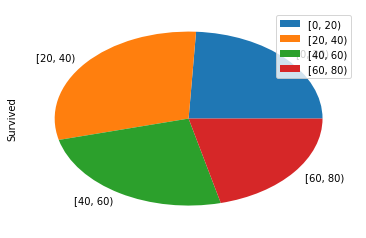

In [152]:
# 年龄对存活率的影响
section_influence(titanic_age_survived, 'Age', 20)

分析结果：年龄段在20～40岁之间的存活率较高

生还人数
        Survived      Age        Fare
Pclass                               
1            136  7111.42  18177.4125
2             87  5168.83   3801.8417
3            119  8924.92   6714.6951
总人数
        Survived  Sex  Age  Fare  Embarked
Pclass                                    
1            216  216  186   216       214
2            184  184  173   184       184
3            491  491  355   491       491
生还率
              Age  Embarked       Fare  Sex  Survived
Pclass                                               
1       38.233441       NaN  84.154687  NaN  0.629630
2       29.877630       NaN  20.662183  NaN  0.472826
3       25.140620       NaN  13.675550  NaN  0.242363


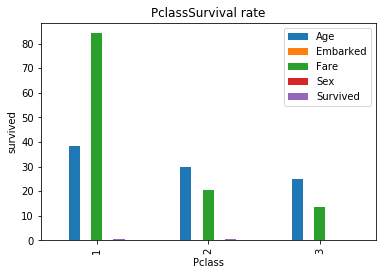

In [153]:
# 仓位对存活率的影响
influence(non_titanic_df, 'Pclass')

分析结果：客舱级别为1的存活率较高约为63%

               Survived
element_group          
[0, 100)          207.0
[100, 200)         15.0
[200, 300)          5.0
[500, 600)          3.0
unknown             2.0
               Survived
element_group          
[0, 100)            526
[100, 200)           23
[200, 300)            9
[500, 600)            3
unknown               6
               Survived
element_group          
[0, 100)       0.393536
[100, 200)     0.652174
[200, 300)     0.555556
[500, 600)     1.000000
unknown        0.333333


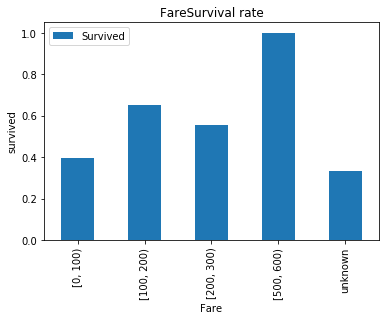

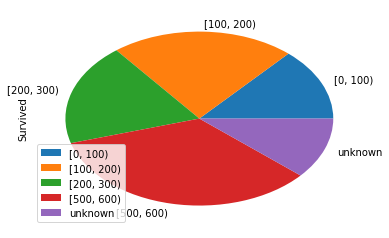

In [154]:
# 票价对存活率的影响
section_influence(titanic_age_survived, 'Fare', 100)

分析结果：票价在100～200之间的存活率较高约65%

生还人数
          Survived  Pclass       Age        Fare
Embarked                                        
C               93     317   4005.92  10072.2962
Q               30     224    786.50   1022.2543
S              217    1514  16312.75  17439.3988
总人数
          Survived  Pclass  Sex  Age  Fare
Embarked                                  
C              168     168  168  130   168
Q               77      77   77   28    77
S              644     644  644  554   644
生还率
                Age       Fare    Pclass  Sex  Survived
Embarked                                               
C         30.814769  59.954144  1.886905  NaN  0.553571
Q         28.089286  13.276030  2.909091  NaN  0.389610
S         29.445397  27.079812  2.350932  NaN  0.336957


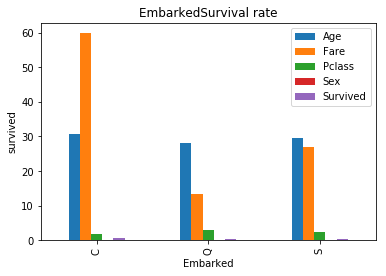

In [155]:
# 登船港口对存活率的影响
influence(titanic_embarked_survived, 'Embarked')

分析结果：登船港口为C的生还率较高约55%

### 结论
    泰坦尼克号的总人数大概有2200多,乘客有1300多,样本中的900左右数据量虽然不是全部人员的数据,但是就乘客而言样本数量所占比例已然接近70%,根据我们分析的结果显示舱位等级和性别对存活率有较大的影响,由于数据不完整且有缺失,分析结果并不一定正确,这种结果只是代表一个较大概率的可能性. 
    除了样本所提供的因素,其他因素已知或者未知对于存活率的影响也是无法忽视,其中我认为泰坦尼克号上的800多工作人员对存活率的影响是非常大的,工作人员的行为显然可以很大程度引导乘客,目前这方面数据完全空缺,所以不能保证我们的结果是完全正确的.